In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")

In [3]:
df=train.append(test)

C:\Users\banso\AppData\Local\Temp\ipykernel_13832\204322198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train.append(test)


In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [11]:
df["Date"]=df.Date_of_Journey.str.split("/").str[0]
df["month"]=df.Date_of_Journey.str.split("/").str[1]
df["year"]=df.Date_of_Journey.str.split("/").str[2]

In [13]:
df.drop("Date_of_Journey", axis=1, inplace=True)

In [14]:
df["dep_HR"]=df.Dep_Time.str.split(":").str[0]
df["dep_min"]=df.Dep_Time.str.split(":").str[1]

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,dep_HR,dep_min,ARR_HR,ARR_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50,21,35


In [16]:
df.drop("Dep_Time", axis=1, inplace=True)

In [18]:
df["ARR_HR"]=df.Arrival_Time.str.split(":").str[0]
df["ARR_min"]=df.Arrival_Time.str.split(":").str[1]

In [20]:
df["ARR_min"]=df.ARR_min.str.split(" ").str[0]

In [22]:
df.drop("Arrival_Time", axis=1, inplace=True)

In [43]:
def Duration_to_hr(duration):
    hr=0
    minu=0
    if "h" in duration:
        hr=int(duration.split("h")[0])
    if "m" in duration:
        minu=int(duration.split('m')[0].split()[-1])
    return hr+minu/60
df["Duration_HR"]=df.Duration.apply(Duration_to_hr)

In [44]:
df.drop

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,dep_HR,dep_min,ARR_HR,ARR_min,Duration_HR
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20,01,10,2.833333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,13,15,7.416667
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,06,2019,09,25,04,25,19.000000
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05,23,30,5.416667
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50,21,35,4.750000


In [45]:
df.drop("Duration", axis=1,inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Total_Stops      13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   month            13354 non-null  int32  
 9   year             13354 non-null  int32  
 10  dep_HR           13354 non-null  int32  
 11  dep_min          13354 non-null  int32  
 12  ARR_HR           13354 non-null  int32  
 13  ARR_min          13354 non-null  int32  
 14  Duration_HR      13354 non-null  float64
dtypes: float64(2), int32(7), object(6)
memory usage: 1.8+ MB


In [48]:
df["Date"]=df.Date.astype(int)

In [49]:
df["month"]=df.month.astype(int)
df["year"]=df.year.astype(int)
df["dep_HR"]=df.dep_HR.astype(int)
df["dep_min"]=df.dep_min.astype(int)
df["ARR_HR"]=df.ARR_HR.astype(int)
df["ARR_min"]=df.ARR_min.astype(int)

In [53]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Total_Stops      13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   month            13354 non-null  int32  
 9   year             13354 non-null  int32  
 10  dep_HR           13354 non-null  int32  
 11  dep_min          13354 non-null  int32  
 12  ARR_HR           13354 non-null  int32  
 13  ARR_min          13354 non-null  int32  
 14  Duration_HR      13354 non-null  float64
dtypes: float64(2), int32(8), object(5)
memory usage: 1.7+ MB


In [57]:
df['Airline']=LabelEncoder.fit_transform(df.Airline)
df['Source']=LabelEncoder.fit_transform(df.Source)
df['Destination']=LabelEncoder.fit_transform(df.Destination)
df['Route']=LabelEncoder.fit_transform(df.Route)
df['Total_Stops']=LabelEncoder.fit_transform(df.Total_Stops)
df['Additional_Info']=LabelEncoder.fit_transform(df.Additional_Info)

In [58]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,month,year,dep_HR,dep_min,ARR_HR,ARR_min,Duration_HR
0,3,0,5,18,4,8,3897.0,24,3,2019,22,20,1,10,2.833333
1,1,3,0,87,1,8,7662.0,1,5,2019,5,50,13,15,7.416667
2,4,2,1,122,1,8,13882.0,9,6,2019,9,25,4,25,19.000000
3,3,3,0,95,0,8,6218.0,12,5,2019,18,5,23,30,5.416667
4,3,0,5,29,0,8,13302.0,1,3,2019,16,50,21,35,4.750000


In [60]:
df.Route.value_counts()

108    3000
18     1941
69     1232
67      896
49      785
       ... 
55        1
57        1
44        1
54        1
51        1
Name: Route, Length: 133, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int64  
 1   Source           13354 non-null  int32  
 2   Destination      13354 non-null  int32  
 3   Route            13354 non-null  int32  
 4   Total_Stops      13354 non-null  int32  
 5   Additional_Info  13354 non-null  int32  
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   month            13354 non-null  int32  
 9   year             13354 non-null  int32  
 10  dep_HR           13354 non-null  int32  
 11  dep_min          13354 non-null  int32  
 12  ARR_HR           13354 non-null  int32  
 13  ARR_min          13354 non-null  int32  
 14  Duration_HR      13354 non-null  float64
dtypes: float64(2), int32(12), int64(1)
memory usage: 1.5 MB


In [63]:
X=df.drop("Price",axis=1)

In [64]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,month,year,dep_HR,dep_min,ARR_HR,ARR_min,Duration_HR
0,3,0,5,18,4,8,24,3,2019,22,20,1,10,2.833333
1,1,3,0,87,1,8,1,5,2019,5,50,13,15,7.416667
2,4,2,1,122,1,8,9,6,2019,9,25,4,25,19.000000
3,3,3,0,95,0,8,12,5,2019,18,5,23,30,5.416667
4,3,0,5,29,0,8,1,3,2019,16,50,21,35,4.750000


In [65]:
y=df.Price

In [66]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

<AxesSubplot:>

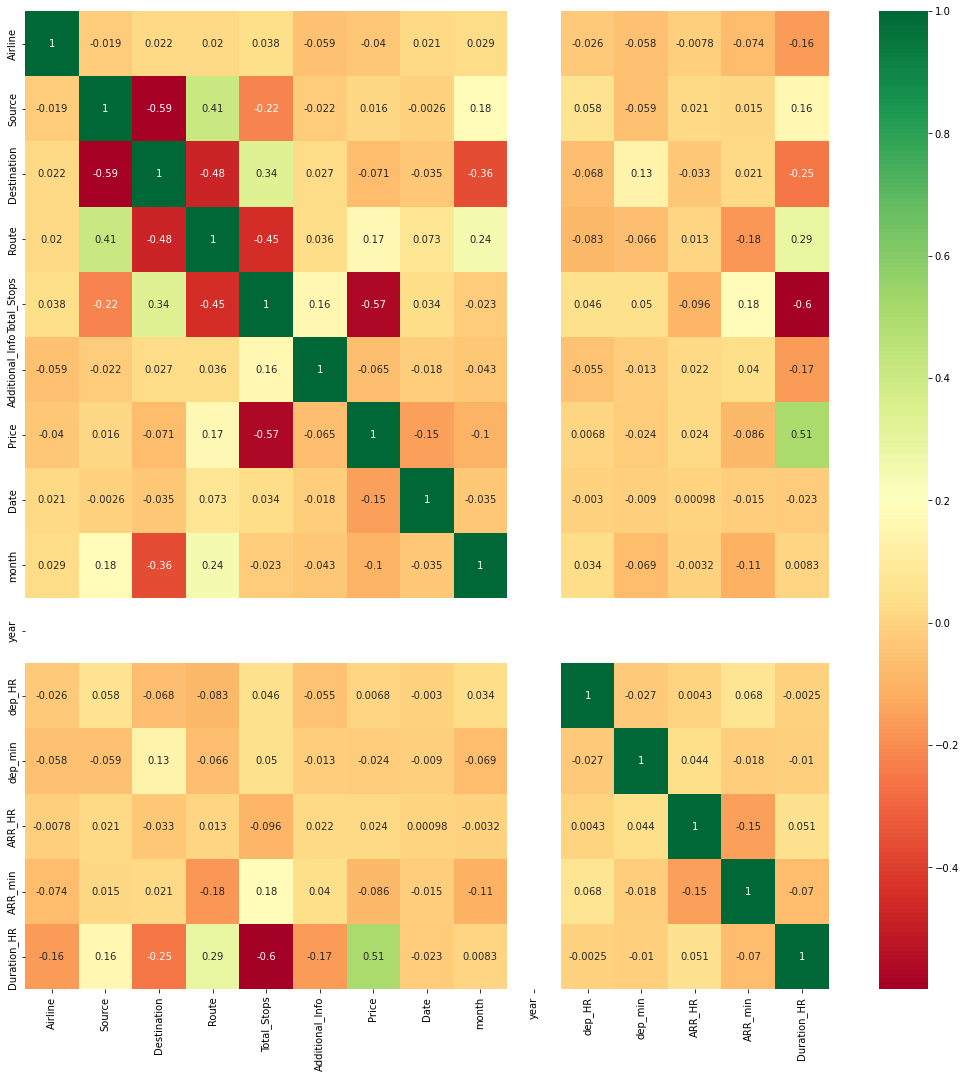

In [69]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [71]:
X.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Date               0
month              0
year               0
dep_HR             0
dep_min            0
ARR_HR             0
ARR_min            0
Duration_HR        0
dtype: int64

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [75]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').